In [5]:
import os
import pickle
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

path = 'finished_models/evaluated_models_swav'
highest_val_f1 = 0
# Iterate through files in the evaluated_models folder
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):  # Ensure it's a directory
        print(f"Processing folder: {folder}")
        
        # Assuming the file is in the format result_{run_type}.pkl
        run_type = folder.split("_")[-1]
        result_file = f"result_{run_type}.pkl"
        result_path = os.path.join(folder_path, result_file)
        
        # Check if the result file exists
        if os.path.isfile(result_path):
            with open(result_path, 'rb') as f:
                result_dict = pickle.load(f)

            # Extract relevant values from result_dict
            run_name = result_dict.get('run_name')
            best_val_f1 = result_dict.get('result_macros')[0]
            test_f1 = result_dict.get('test_macros')[0]
            
            # Check if there are predictions and labels
            if len(result_dict['predss']) == 1:
                val_preds, test_preds = result_dict['predss'][0]
            
            if len(result_dict['true_labels']) == 1:
                val_ytrue, test_ytrue = result_dict['true_labels'][0]
            
            # from sigmoid to class with threshold 0.5?
            val_preds = np.argmax((val_preds > 0.5).astype(int), axis=1)
            test_preds = np.argmax((test_preds > 0.5).astype(int), axis=1)
            
            # one-hot labels to class
            val_ytrue = np.argmax(val_ytrue, axis=1)  # Get the class with highest probability
            test_ytrue = np.argmax(test_ytrue, axis=1) # Get the class with highest probability
             
            # Optionally, print the results for each folder
            print(f"Run Name: {run_name}")
            print(f"Best Validation F1: {best_val_f1}")
            print(f"Test F1: {test_f1}")
            
            if best_val_f1 > highest_val_f1:
                highest_val_f1 = best_val_f1
                highest_class_report = classification_report(val_ytrue, val_preds)
                test_class_report = classification_report(test_ytrue, test_preds)
                best_test_f1 = test_f1
            # Results
            print("Validation Classification Report:")
            print(classification_report(val_ytrue, val_preds))
            
            print("Test Classification Report:")
            print(classification_report(test_ytrue, test_preds))
            
            print('\n'*2)

            print("Validation Confusion Matrix:")
            print(confusion_matrix(val_ytrue, val_preds))
            
            print("Test Confusion Matrix:")
            print(confusion_matrix(test_ytrue, test_preds))
            
        else:
            print(f"Warning: {result_file} not found in {folder_path}")
            
print(f"Highest Validation F1 Score: {highest_val_f1} for folder {folder}")
print("Highest Validation Classification Report:")
print(highest_class_report)
print("Test F1 Score: ", best_test_f1)
print('Test classification report:')
print(test_class_report)


Processing folder: 10-04-2025-22-05_swav_DTW_w=1_r=10_finetuned
Run Name: swav_DTW_w=1_r=10_finetuned
Best Validation F1: 0.5159104257145007
Test F1: 0.7314965354832498
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79     18661
           1       0.85      0.62      0.72     19606
           2       0.12      0.01      0.02      1493

    accuracy                           0.74     39760
   macro avg       0.55      0.52      0.51     39760
weighted avg       0.75      0.74      0.73     39760

Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     26000
           1       0.60      0.85      0.71     12250
           2       1.00      0.50      0.67      1130

    accuracy                           0.78     39380
   macro avg       0.84      0.70      0.73     39380
weighted avg       0.82      0.78      0.78     39380




Vali

c:\Users\Dieko\anaconda3\envs\ecg\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dieko\anaconda3\envs\ecg\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dieko\anaconda3\envs\ecg\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.89      0.79      0.84     26000
           1       0.62      0.80      0.70     12250
           2       1.00      0.62      0.77      1130

    accuracy                           0.79     39380
   macro avg       0.84      0.74      0.77     39380
weighted avg       0.81      0.79      0.79     39380




Validation Confusion Matrix:
[[17892   769     0]
 [ 9027 10579     0]
 [  490  1003     0]]
Test Confusion Matrix:
[[20443  5557     0]
 [ 2402  9848     0]
 [    4   424   702]]
Processing folder: 10-04-2025-22-29_swav_TO_crop_ratio_range=[0.1, 0.2]_finetuned
Run Name: swav_TO_crop_ratio_range=[0.1, 0.2]_finetuned
Best Validation F1: 0.5447993754448767
Test F1: 0.7896761320642672
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81     18661
           1       0.88      0.65      0.75     19606
           2       0.15      0.03 

### Interperation of results

It is clear that the validation class 3 scores is always lower than the test class 3 score, which indicates that the presence of class 3 in validation is of a different type than the class 3 signals present in the test data. And the test data better aligns with the class 3 during training.

AUC: Measures the model’s ability to distinguish between classes. For multiclass, it's often macro-averaged one-vs-rest ROC AUC or PR AUC.

Probabilistic models where you care about confidence scores.

Situations where thresholding is flexible or you care about score calibration.

Often used in medical or risk assessment domains where ranking is more critical than classification labels.

describe the case where macro auc is decreasing while macro f1 is increasing for validation scores at the higher epochs of fine-tuning?

In [6]:
import os
import pickle
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

finetune_rows = []
linear_eval_rows = []

def get_class_accuracies(y_true, y_pred):
    num_classes = np.max(y_true) + 1
    accuracies = []
    for c in range(num_classes):
        mask = y_true == c
        acc = accuracy_score(y_true[mask], y_pred[mask]) if np.any(mask) else 0.0
        accuracies.append(acc)
    return accuracies

# Iterate through folders
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        # print(f"Processing folder: {folder}")
        
        run_type = folder.split("_")[-1]
        result_file = f"result_{run_type}.pkl"
        result_path = os.path.join(folder_path, result_file)

        if os.path.isfile(result_path):
            with open(result_path, 'rb') as f:
                result_dict = pickle.load(f)

            run_name = result_dict.get('run_name')
            augmentation = run_name.split('_')[1] if run_name else "unknown"
            parameters = run_name.split('_')[2:-1] if run_name else "unknown"

            val_macro_f1 = result_dict.get('result_macros')[0]
            test_macro_f1 = result_dict.get('test_macros')[0]

            val_preds, test_preds = result_dict['predss'][0]
            val_ytrue, test_ytrue = result_dict['true_labels'][0]

            val_preds = np.argmax((val_preds > 0.5).astype(int), axis=1)
            test_preds = np.argmax((test_preds > 0.5).astype(int), axis=1)
            val_ytrue = np.argmax(val_ytrue, axis=1)
            test_ytrue = np.argmax(test_ytrue, axis=1)

            val_accs = get_class_accuracies(val_ytrue, val_preds)
            test_accs = get_class_accuracies(test_ytrue, test_preds)

            row = [
                augmentation,
                str(parameters),
                val_macro_f1,
                *val_accs,
                test_macro_f1,
                *test_accs
            ]

            if result_dict.get('linear_evaluation'):
                linear_eval_rows.append(row)
            else:
                finetune_rows.append(row)
        else:
            print(f"Warning: {result_file} not found in {folder_path}")

# Create DataFrames
columns = [
    'augmentation', 'parameters', 
    'val_macro_f1', 'val_acc_class1', 'val_acc_class2', 'val_acc_class3', 
    'test_macro_f1', 'test_acc_class1', 'test_acc_class2', 'test_acc_class3'
]

finetune_df = pd.DataFrame(finetune_rows, columns=columns)
linear_eval_df = pd.DataFrame(linear_eval_rows, columns=columns)

# Show the tables
print(f"Mean Validation Macro F1: {finetune_df.val_macro_f1.mean():.4f}")
print(f"Mean Test Macro F1: {finetune_df.test_macro_f1.mean():.4f}")
print(f"Class 3 - Val - Accuracy: {finetune_df.val_acc_class3.mean():.4f}")
print(f"Class 3 - Test -  Accuracy: {finetune_df.test_acc_class3.mean():.4f}")
finetune_df.sort_values(by='val_macro_f1', ascending=False)

Mean Validation Macro F1: 0.5520
Mean Test Macro F1: 0.7450
Class 3 - Val - Accuracy: 0.0448
Class 3 - Test -  Accuracy: 0.4573


,augmentation,parameters,val_macro_f1,val_acc_class1,val_acc_class2,val_acc_class3,test_macro_f1,test_acc_class1,test_acc_class2,test_acc_class3
5,TO,"['crop', 'ratio', 'range=[0.0, 0.5]']",0.628992,0.934034,0.741457,0.129270,0.769986,0.892192,0.749143,0.510619
10,ChR,"['magnitude', 'range=[0.33, 1.0]']",0.602180,0.962435,0.652249,0.134628,0.825744,0.921038,0.721469,0.702655
18,BlW,"['fs=100', 'C=1.0']",0.578197,0.949520,0.617107,0.085064,0.635688,0.863577,0.748980,0.219469
9,ChR,"['magnitude', 'range=[0.33, 3.0]']",0.567100,0.955790,0.691064,0.042867,0.824011,0.896154,0.759020,0.706195
12,EM,['var=0.01'],0.559278,0.950163,0.650821,0.048225,0.752110,0.862038,0.722041,0.526549
4,TO,"['crop', 'ratio', 'range=[0.4, 0.5]']",0.555402,0.969562,0.633633,0.036169,0.797282,0.925615,0.739347,0.561947
7,GN,['var=0.1'],0.553702,0.955790,0.619657,0.036839,0.759724,0.828192,0.845959,0.496460
11,ChR,"['magnitude', 'range=[0.5, 2.0]']",0.548345,0.940786,0.699429,0.014735,0.799556,0.837269,0.805959,0.651327
17,BlW,"['fs=100', 'C=0.7']",0.548088,0.945930,0.611803,0.032150,0.758592,0.906385,0.718367,0.444248
3,TO,"['crop', 'ratio', 'range=[0.1, 0.2]']",0.544799,0.953968,0.649954,0.028801,0.789676,0.924192,0.729633,0.553097


In [74]:
print(f"Mean Validation Macro F1: {linear_eval_df.val_macro_f1.mean():.4f}")
print(f"Mean Test Macro F1: {linear_eval_df.test_macro_f1.mean():.4f}")
print(f"Class 3 - Val - Accuracy: {linear_eval_df.val_acc_class3.mean():.4f}")
print(f"Class 3 - Test -  Accuracy: {linear_eval_df.test_acc_class3.mean():.4f}")
linear_eval_df.sort_values(by='test_macro_f1', ascending=False)

Mean Validation Macro F1: 0.4974
Mean Test Macro F1: 0.7247
Class 3 - Val - Accuracy: 0.0343
Class 3 - Test -  Accuracy: 0.4590


,augmentation,parameters,val_macro_f1,val_acc_class1,val_acc_class2,val_acc_class3,test_macro_f1,test_acc_class1,test_acc_class2,test_acc_class3
11,ChR,"['magnitude', 'range=[0.5, 2.0]']",0.491135,0.969026,0.502856,0.002679,0.790412,0.854000,0.733796,0.661947
5,TO,"['crop', 'ratio', 'range=[0.0, 0.5]']",0.545336,0.965704,0.537438,0.033490,0.785653,0.927846,0.654041,0.466372
3,TO,"['crop', 'ratio', 'range=[0.1, 0.2]']",0.531322,0.920583,0.509793,0.144675,0.772786,0.787000,0.786286,0.594690
9,ChR,"['magnitude', 'range=[0.33, 3.0]']",0.499065,0.958791,0.539580,0.000000,0.767149,0.786269,0.803918,0.621239
6,GN,['var=0.01'],0.465170,0.944162,0.428797,0.020764,0.757476,0.831846,0.633796,0.669912
4,TO,"['crop', 'ratio', 'range=[0.4, 0.5]']",0.513631,0.967579,0.513567,0.030810,0.756644,0.873808,0.730694,0.500885
12,EM,['var=0.01'],0.492957,0.962971,0.464246,0.034829,0.739059,0.882846,0.596735,0.561947
16,BlW,"['fs=100', 'C=0.1']",0.494122,0.944269,0.483015,0.023443,0.738153,0.867654,0.669143,0.548673
18,BlW,"['fs=100', 'C=1.0']",0.493324,0.948663,0.495818,0.018754,0.737274,0.857192,0.668571,0.530088
7,GN,['var=0.1'],0.499459,0.942983,0.504641,0.022103,0.735588,0.853385,0.679020,0.496460


Conclusion: test and validation distributions do not match for class 3

### Comparing validation and test set class 3 characteristics

In [28]:
data_path = "C:/Users/Dieko/OneDrive - UvA/Studie/Master Thesis/exploratory data analysis/data/but-qdb/brno-university-of-technology-ecg-quality-database-but-qdb-1.0.0"
train_records = ['104001', '105001', '115001', '118001', '121001', '125001', '126001']
val_records = ['103001', '103002', '103003', '111001', '113001', '123001']
test_records = ['100001', '100002', '114001', '122001', '124001']
signal_fs = 100
window_size = 250
transforms = None

from butqdb_dataloaders import AnnotatedDataset
val_dataset = AnnotatedDataset(
    data_path, val_records, window_size, signal_fs,
    transforms=transforms, stride=None, mode='random', onehot_label=True
)

test_dataset = AnnotatedDataset(
    data_path, test_records, window_size, signal_fs,
    transforms=transforms, stride=None, mode='random', onehot_label=True
)


In [75]:
import torch

def compute_mean_tensor(dataset, class_label=None):
    total_sum = torch.zeros(250, 1)
    count = 0

    for signal_tensor, label in dataset:
        label_idx = torch.argmax(label).item()
        if class_label is not None and label_idx+1 != class_label:
            continue
        total_sum += signal_tensor
        count += 1

    mean_tensor = total_sum / count
    return mean_tensor

val_mean = compute_mean_tensor(val_dataset, class_label=3)
test_mean = compute_mean_tensor(test_dataset, class_label=3)
print("Validation Set signal mean:")
print(val_mean.mean())

print("\nTest Set signal mean:")
print(test_mean.mean())

Validation Set signal mean:
tensor(-70.8489)

Test Set signal mean:
tensor(25.0770)


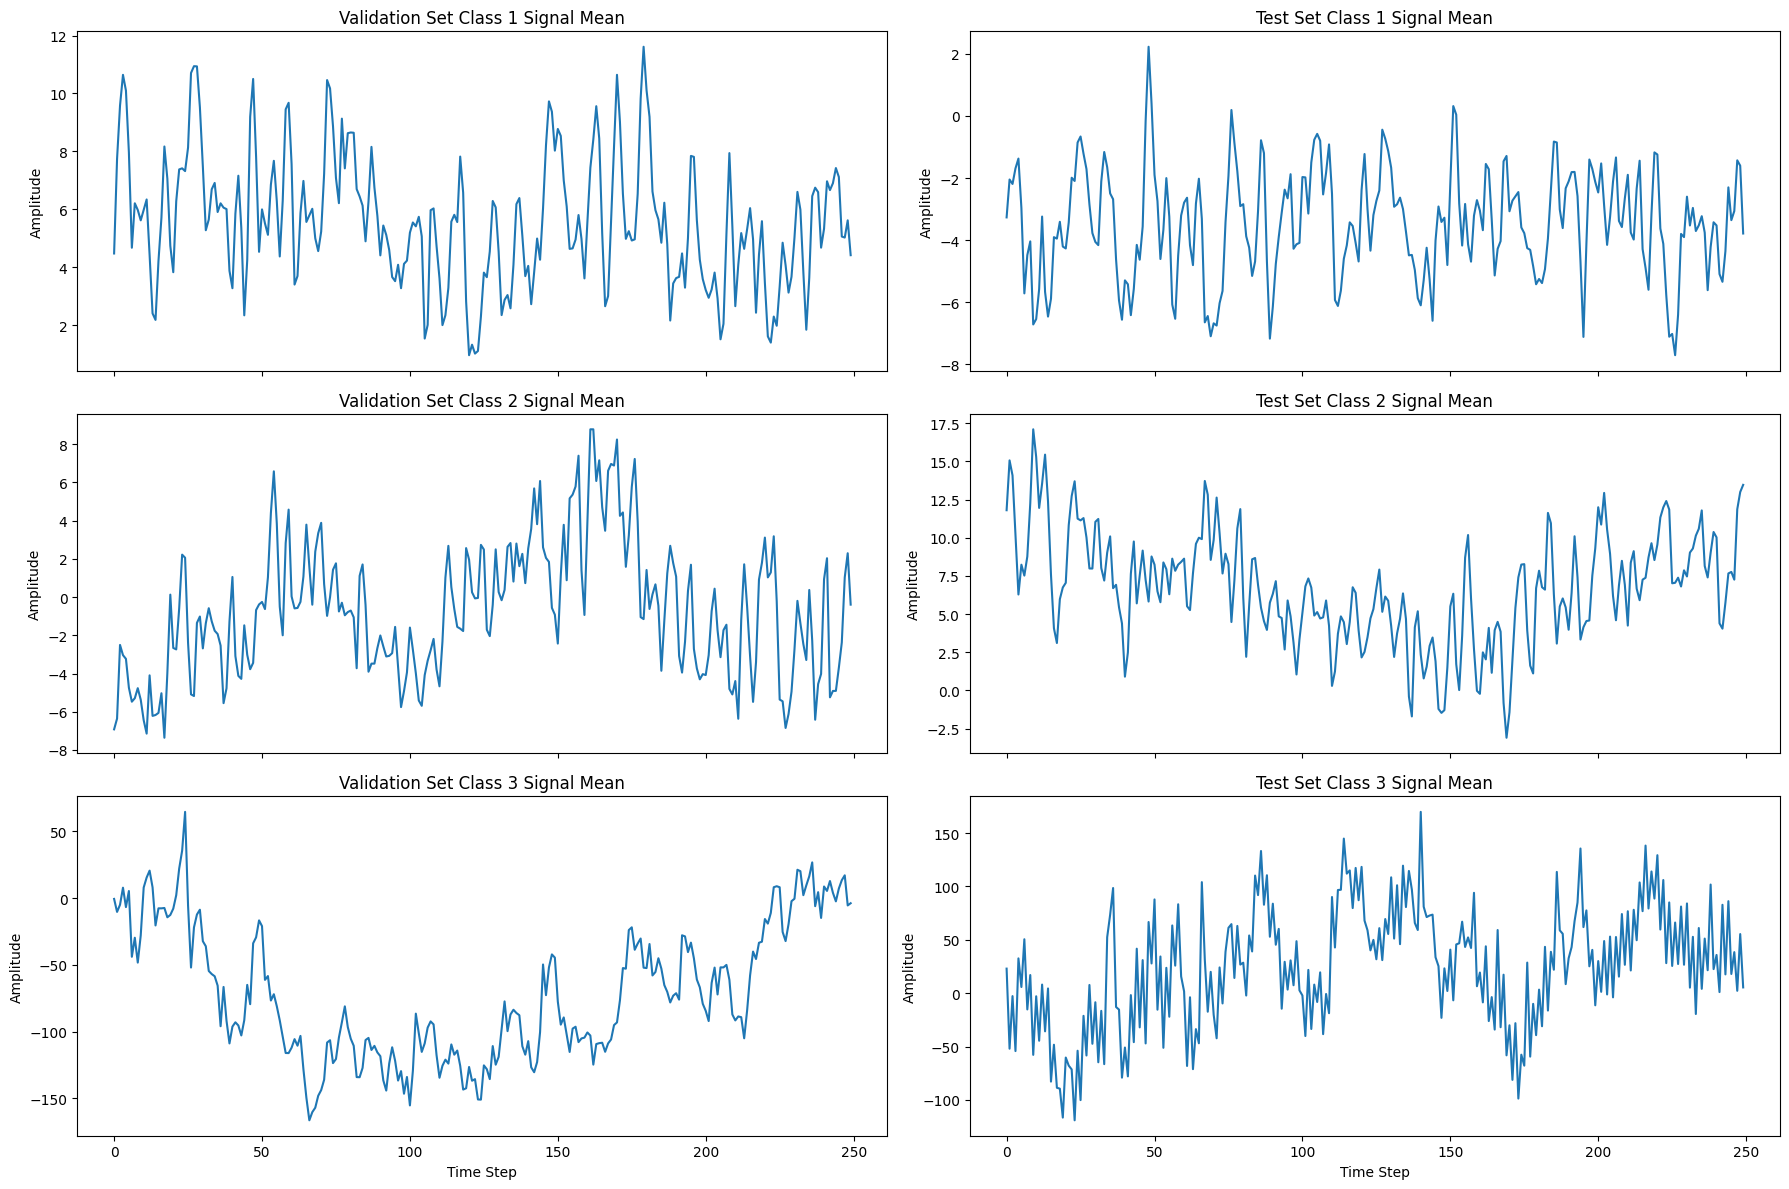

In [63]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(18, 12), sharex=True)

for i, class_label in enumerate([1, 2, 3]):
    val_mean = compute_mean_tensor(val_dataset, class_label=class_label)
    test_mean = compute_mean_tensor(test_dataset, class_label=class_label)
    
    if val_mean is not None:
        axs[i, 0].plot(val_mean.numpy())
        axs[i, 0].set_title(f"Validation Set Class {class_label} Signal Mean")
        axs[i, 0].set_ylabel("Amplitude")

    if test_mean is not None:
        axs[i, 1].plot(test_mean.numpy())
        axs[i, 1].set_title(f"Test Set Class {class_label} Signal Mean")
        axs[i, 1].set_ylabel("Amplitude")

# Set x-axis label on the bottom row
axs[2, 0].set_xlabel("Time Step")
axs[2, 1].set_xlabel("Time Step")

plt.tight_layout()
plt.show()


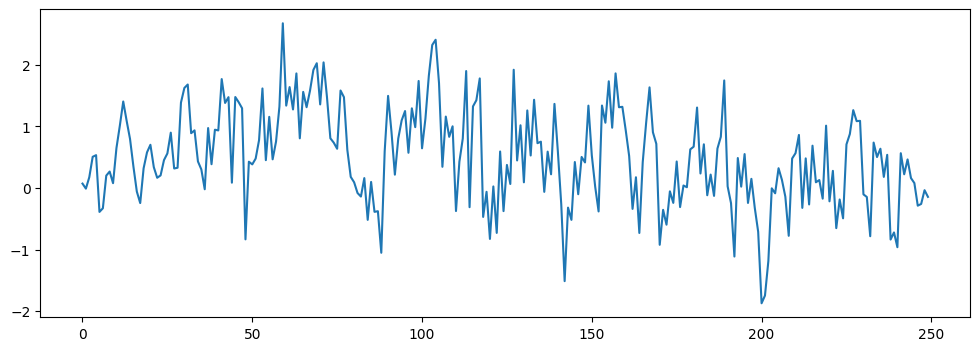

In [73]:
from butqdb_dataloaders import TrainDataset
train_dataset = TrainDataset(
    data_path, train_records, window_size, signal_fs,
    transforms=transforms, stride=None, mode='random')

plt.figure(figsize=(12, 4))
plt.plot(compute_mean_tensor(train_dataset, class_label=None))